<a href="https://colab.research.google.com/github/vir123-devf/Cat-vs-dog-classification-using-MobileNetv2/blob/main/Cat_vs_Dog_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# you can download dataset from --> https://zenodo.org/records/5226945

In [15]:
# extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/cats_dogs_light.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [16]:
import os
# Counting the number of files in train folder
path,dirs,files = next(os.walk('/content/train')) # take out the train,test folder from cats_dog_light folder and drop the folder outside and then run this cell
dog_count = 0
file_count = len(files)
print(f"number of image in train folder:{file_count}")

number of image in train folder:1000


In [17]:
file_names = os.listdir('/content/train')
print(file_names[:10])

['cat.10043.jpg', 'dog.10359.jpg', 'cat.10305.jpg', 'cat.10297.jpg', 'cat.10007.jpg', 'dog.10046.jpg', 'cat.10220.jpg', 'dog.10358.jpg', 'cat.10299.jpg', 'dog.10379.jpg']


In [18]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
!pip install opencv-python
from google.colab.patches import cv2_imshow

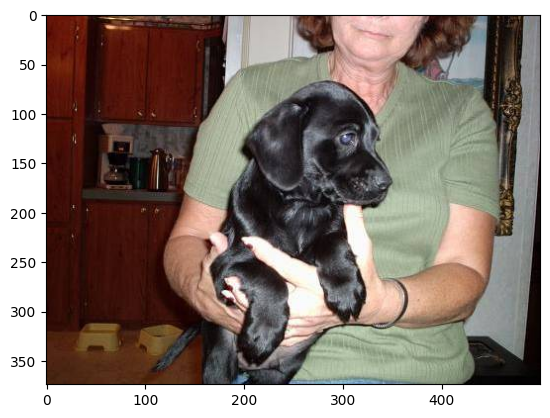

In [19]:
# Displaying the dog image
img = mpimg.imread('/content/train/dog.10065.jpg')
imgplt = plt.imshow(img)
plt.show()


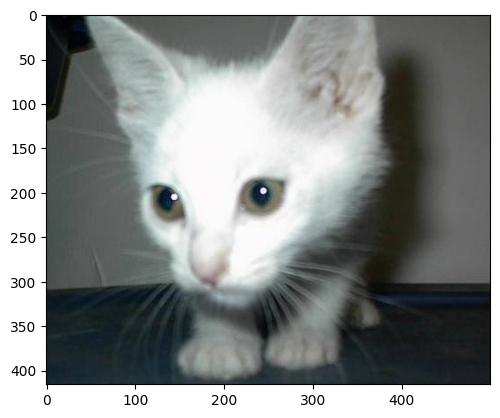

In [20]:
# Displaying the cat image
img = mpimg.imread('/content/train/cat.10159.jpg')
imgplt = plt.imshow(img)
plt.show()

In [21]:
file_names = os.listdir('/content/train') # take out the train,test folder from cats_dog_light folder and drop the folder outside and then run this cell
dog_count = 0
cat_count = 0
for img_file in file_names:
  name = img_file[:3]
  if name == 'dog':
    dog_count+=1
  else:
    cat_count+=1
print('Number of dog image:',dog_count)
print('Number of cat image:',cat_count)

Number of dog image: 545
Number of cat image: 455


In [14]:
# Creating a directory for resized images
original_folder = '/content/train/'
resized_folder = '/content/image_resized/' # make a folder named image_resized before running
for i in range(1000):
  filename = os.listdir(original_folder)[i]
  img_path =original_folder+filename
  img = Image.open(img_path) # image is opening the image in train folder and storing them to img
  img = img.resize((224,224))
  img = img.convert('RGB') # IT TELL THAT IMAGE IS COLOURED

  newimg_path = resized_folder+filename
  img.save(newimg_path)

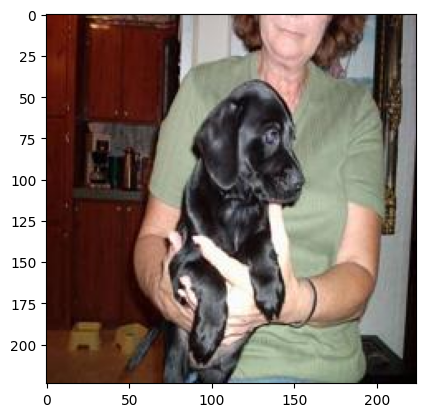

In [22]:
# Displaying resized dog image
img = mpimg.imread('/content/image_resized/dog.10065.jpg')
imgplt = plt.imshow(img)
plt.show()

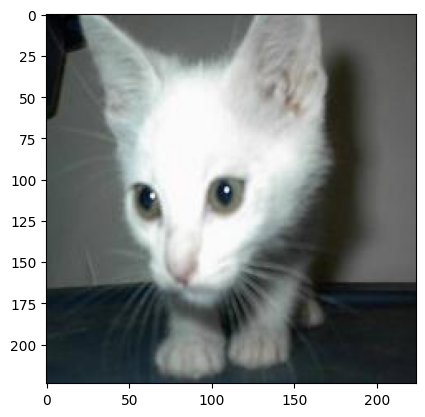

In [23]:
# Displaying resized cat image
img = mpimg.imread('/content/image_resized/cat.10159.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating for loop to assign label**
1. Dog--> 1
2. Cat-->0

In [24]:
filenames = os.listdir('/content/image_resized/')
labels =[]
for i in range(1000):
  file_name = filenames[i]
  label = file_name[:3]
  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)


In [25]:
print(filenames[:5])
print(len(filenames))
print(labels[:5])
print(len(labels))


['cat.10043.jpg', 'dog.10359.jpg', 'cat.10305.jpg', 'cat.10297.jpg', 'cat.10007.jpg']
1000
[0, 1, 0, 0, 0]
1000


In [26]:
# Counting number of dogs and cats in 1000 images
values,counts = np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[455 545]


In [27]:
# Converting all the resized images to numpy array
import cv2
import glob

In [28]:
image_dir = '/content/image_resized/'
image_ext = ['png','jpg'] # the extension in dataset can be of png or jpg
files=[]
[files.extend(glob.glob(image_dir+'*.'+e))for e in image_ext] # glob.glob is locating image and extend is extending the list
dog_cat_images = np.asarray([cv2.imread(file) for file in files]) # asarray will include all array read by cv2 into a single majpor array(1 dimensional array)

In [29]:
print(dog_cat_images)

[[[[145 154 168]
   [133 142 156]
   [131 140 154]
   ...
   [148 152 157]
   [142 146 151]
   [150 154 159]]

  [[147 156 170]
   [135 144 158]
   [132 141 155]
   ...
   [151 155 160]
   [142 146 151]
   [147 151 156]]

  [[134 143 157]
   [122 131 145]
   [119 128 142]
   ...
   [158 162 167]
   [159 163 168]
   [166 170 175]]

  ...

  [[150 131 116]
   [148 129 114]
   [131 112  97]
   ...
   [145 123 105]
   [143 121 103]
   [142 120 102]]

  [[149 130 115]
   [151 132 117]
   [141 122 107]
   ...
   [143 123 105]
   [140 118 100]
   [137 116  95]]

  [[152 133 118]
   [152 133 118]
   [148 129 114]
   ...
   [142 122 104]
   [138 117  96]
   [133 112  91]]]


 [[[159 167 167]
   [155 163 163]
   [153 161 161]
   ...
   [146 151 150]
   [148 153 152]
   [153 158 157]]

  [[158 166 166]
   [155 163 163]
   [153 161 161]
   ...
   [154 159 158]
   [157 162 161]
   [161 166 165]]

  [[155 165 165]
   [153 163 163]
   [152 162 162]
   ...
   [145 150 149]
   [145 150 149]
   [148 153

In [30]:
type(dog_cat_images)

numpy.ndarray

In [31]:
print(dog_cat_images.shape)

(1000, 224, 224, 3)


In [32]:
x= dog_cat_images
y=np.asarray(labels) # converting python list to numpy array for faster processing

In [33]:
y

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,

# Train Test Split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [35]:
print(x.shape,x_train.shape,x_test.shape)

(1000, 224, 224, 3) (800, 224, 224, 3) (200, 224, 224, 3)


1.  800 -- training images
2.  200 -- testing images

In [36]:
# scaling the data
x_train_scaled =x_train/255
x_test_scaled =x_test/255

In [37]:
print(x_train_scaled)

[[[[0.62352941 0.61568627 0.58431373]
   [0.62745098 0.61960784 0.58823529]
   [0.62745098 0.61960784 0.58823529]
   ...
   [0.33333333 0.53333333 0.6627451 ]
   [0.33333333 0.52941176 0.67058824]
   [0.32156863 0.5254902  0.66666667]]

  [[0.61960784 0.61176471 0.58039216]
   [0.62352941 0.61568627 0.58431373]
   [0.62352941 0.61568627 0.58431373]
   ...
   [0.31764706 0.51764706 0.64705882]
   [0.31764706 0.51372549 0.65490196]
   [0.30588235 0.50980392 0.65098039]]

  [[0.62745098 0.63137255 0.59607843]
   [0.62745098 0.63137255 0.59607843]
   [0.62745098 0.63137255 0.59607843]
   ...
   [0.31372549 0.51372549 0.64313725]
   [0.30980392 0.50588235 0.64705882]
   [0.29803922 0.50196078 0.64313725]]

  ...

  [[0.41176471 0.44705882 0.50196078]
   [0.37647059 0.41176471 0.46666667]
   [0.35294118 0.38823529 0.44313725]
   ...
   [0.41568627 0.47843137 0.54117647]
   [0.40392157 0.46666667 0.52941176]
   [0.40784314 0.47058824 0.53333333]]

  [[0.4        0.43529412 0.49019608]
   [0.3

**Building the Neural Network**

In [38]:
!pip install tensorflow
!pip install tensorflow_hub
!pip install --upgrade tensorflow tensorflow_hub
import tensorflow as tf
import tensorflow_hub as hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 1.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.18.1 which is incompatible.


In [39]:
mobilenet_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
pretrained_model = hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False) # false tells wheather the layer is trainable or not

In [40]:
print("TensorFlow Version:", tf.__version__)
print("TensorFlow Hub Version:", hub.__version__)

TensorFlow Version: 2.18.1
TensorFlow Hub Version: 0.16.1


In [41]:
!pip install tf_keras
import tf_keras  # in colab environment, tf_keras instead of tf.keras ,means tf_keras.Sequential instead of tf.keras.Sequential


num_of_classes = 2

model = tf_keras.Sequential([

    pretrained_model,
    tf_keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 2)                 2004      
                                                                 
Total params: 3542269 (13.51 MB)
Trainable params: 2004 (7.83 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


In [42]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [43]:
history = model.fit(x_train_scaled, y_train, epochs=5,validation_split =0.2)

Epoch 1/5
20/20 [==============================] - 53s 2s/step - loss: 0.5382 - accuracy: 0.7750 - val_loss: 0.1291 - val_accuracy: 0.9438
Epoch 2/5
20/20 [==============================] - 27s 1s/step - loss: 0.1235 - accuracy: 0.9516 - val_loss: 0.1027 - val_accuracy: 0.9688
Epoch 3/5
20/20 [==============================] - 25s 1s/step - loss: 0.0706 - accuracy: 0.9750 - val_loss: 0.1041 - val_accuracy: 0.9688
Epoch 4/5
20/20 [==============================] - 25s 1s/step - loss: 0.0459 - accuracy: 0.9828 - val_loss: 0.1048 - val_accuracy: 0.9688
Epoch 5/5
20/20 [==============================] - 31s 2s/step - loss: 0.0351 - accuracy: 0.9922 - val_loss: 0.1054 - val_accuracy: 0.9625


In [44]:
y_prob = model.predict(x_test_scaled)

7/7 [==============================] - 7s 833ms/step


In [45]:
yp = y_prob.argmax(axis=1)


In [46]:
yp

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1])

In [47]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test,yp)

0.96

Classification Model Prediction

Enter the path of downloaded image: /content/images.jpg


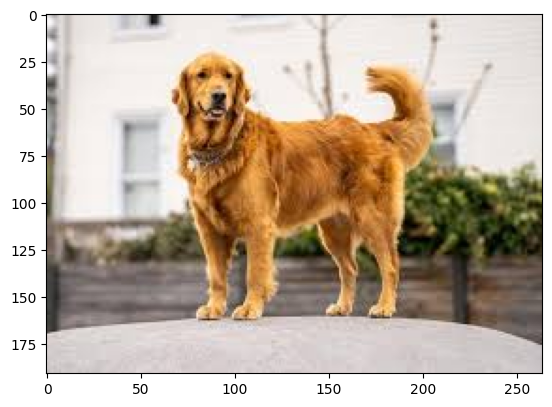

1/1 [==============================] - 0s 96ms/step
 The image represents: Dog


In [56]:
# predicting for downloaded image from website-


path = input("Enter the path of downloaded image: ")
img2 = mpimg.imread(path)
imgplt = plt.imshow(img2)
plt.show()

img1 = Image.open(path)
img1 = img1.resize((224, 224))
img1 = img1.convert('RGB')
img1 = np.array(img1)
img1 = img1 / 255.0  # optional depending on model preprocessing

# Add batch dimension
img1 = np.expand_dims(img1, axis=0)

# Predict
y_p = model.predict(img1)
y_predicted = y_p.argmax(axis=1)
if y_predicted == [1] :
    print(" The image represents: Dog")
else:
    print("The image represents: Cat")


Enter the path of downloaded image: /content/Cat_August_2010-4.jpg


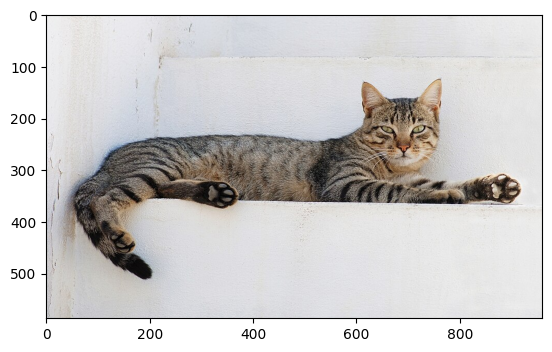

1/1 [==============================] - 0s 97ms/step
The image represents: Cat


In [55]:
# predicting for downloaded image from website-


path = input("Enter the path of downloaded image: ")
img2 = mpimg.imread(path)
imgplt = plt.imshow(img2)
plt.show()

img1 = Image.open(path)
img1 = img1.resize((224, 224))
img1 = img1.convert('RGB')
img1 = np.array(img1)
img1 = img1 / 255.0  # optional depending on model preprocessing

# Add batch dimension ---> important step
img1 = np.expand_dims(img1, axis=0)

# Predict
y_p = model.predict(img1)
y_predicted = y_p.argmax(axis=1)
if y_predicted == [1] :
    print(" The image represents: Dog")
else:
    print("The image represents: Cat")
